In [1]:
#importing the necessary libraries:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

In [2]:
#target distribution
def target_dist_pdf(x):
    return sts.norm.pdf(x, -4, 0.5) + sts.norm.pdf(x, 4, 1)


#proposal distribution

def proposal_dist_pdf(x, x0, epsilon):
    return sts.norm.pdf(x, x0, epsilon)

def proposal_rvs(x0, epsilon, size=1):
    return sts.norm.rvs(x0, epsilon, size=size)

In [9]:
def run_monte_carlo(epsilon, num_samples):
    # the initial x_0 that we will choose here is 0
    samples = [0]  
    accepted = 0  
    for t in range(num_samples):
        proposed = proposal_rvs(samples[t], epsilon)
        accept_prob = min(1, target_dist_pdf(proposed) / target_dist_pdf(samples[t]) *
                          proposal_dist_pdf(samples[t], proposed, epsilon) /
                          proposal_dist_pdf(proposed, samples[t], epsilon))
        # use binomial distribution to decide whether we will accept or not:
        if (sts.binom.rvs(1, accept_prob) == 1):
            # Accepted
            samples.append(proposed)
            accepted += 1
        else:
            
            samples.append(samples[t])
    return {
        'samples': samples,
        'acceptance_rate': accepted / num_samples}

In [11]:
#using these values that were used in the class:
epsilon = 0.5 
num_samples = 1000
mc = run_monte_carlo(epsilon, num_samples)

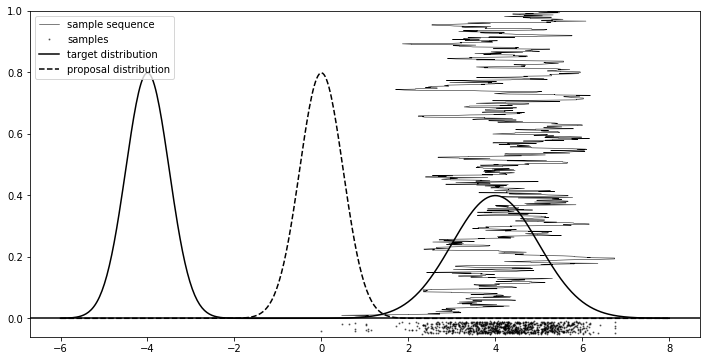

Acceptance rate: 0.853


In [26]:
#plotting the graph of the samples on top of the target distribution to check whether the chain stucked in one peak:
plt.figure(figsize=(12, 6))
plot_x = np.linspace(-6, 8, 500)

plt.plot(
    mc['samples'], np.arange(num_samples+1)/num_samples,
    '-', label='sample sequence', color='black', linewidth=0.5)
plt.plot(
    mc['samples'], sts.uniform.rvs(loc=-0.05, scale=-0.01+0.05, size=num_samples+1), #the samples that we obtained above
    'k.', alpha=0.5, markersize=2, label='samples')
plt.plot(plot_x, target_dist_pdf(plot_x), 'k-', label='target distribution')
plt.plot(plot_x, proposal_dist_pdf(plot_x, 0, epsilon), 'k--', label='proposal distribution')
plt.axhline(0, color='black')
plt.ylim(-0.06, 1)
plt.legend()
plt.show()
print('Acceptance rate:', mc['acceptance_rate'])

In [ ]:
#note that the graph above shows that the sampler got 
#stuck in one peak which means that we need to fix our model (maybe choose a better step size)